In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Step 1: Load the dataset
df=pd.read_csv("/content/Retail_sales.csv")
df.head()
#Display info
print("\nInformation About Data:")
print(df.info())
print("\nFirst 5 observations of the dataset:")
print(df.head())
print("\nLast 5 observations of the dataset:")
print(df.tail())
print("\nStatistics Summary of Data:")
print(df.describe())
print("\nCheck for Duplication:")
print(df.nunique())


Information About Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Store ID               30000 non-null  object 
 1   Product ID             30000 non-null  int64  
 2   Date                   30000 non-null  object 
 3   Units Sold             30000 non-null  int64  
 4   Sales Revenue (USD)    30000 non-null  float64
 5   Discount Percentage    30000 non-null  int64  
 6   Marketing Spend (USD)  30000 non-null  int64  
 7   Store Location         30000 non-null  object 
 8   Product Category       30000 non-null  object 
 9   Day of the Week        30000 non-null  object 
 10  Holiday Effect         30000 non-null  bool   
dtypes: bool(1), float64(1), int64(4), object(5)
memory usage: 2.3+ MB
None

First 5 observations of the dataset:
     Store ID  Product ID        Date  Units Sold  Sales Revenue (USD)  \
0 

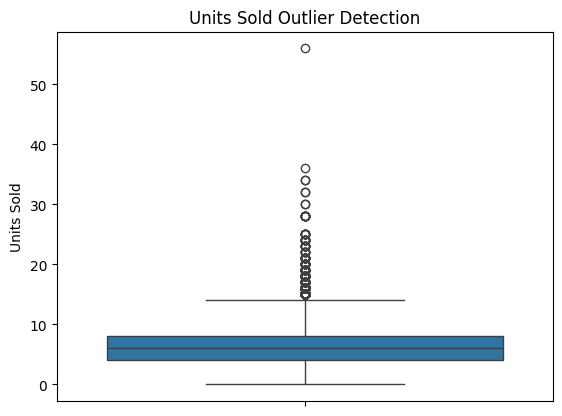

In [5]:
# Step 2: Remove duplicate rows
df = df.drop_duplicates()

# Step 3: Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Step 4: One-hot encode categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_cols)

# Step 5: Outlier detection for 'Units Sold'
sns.boxplot(df['Units Sold'])
plt.title('Units Sold Outlier Detection')
plt.show()

# Step 6: Extract new features from 'Date'
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Step 7: Save the cleaned data
df.to_csv('Retail_sales_cleaned.csv', index=False)

<Figure size 2000x1500 with 0 Axes>

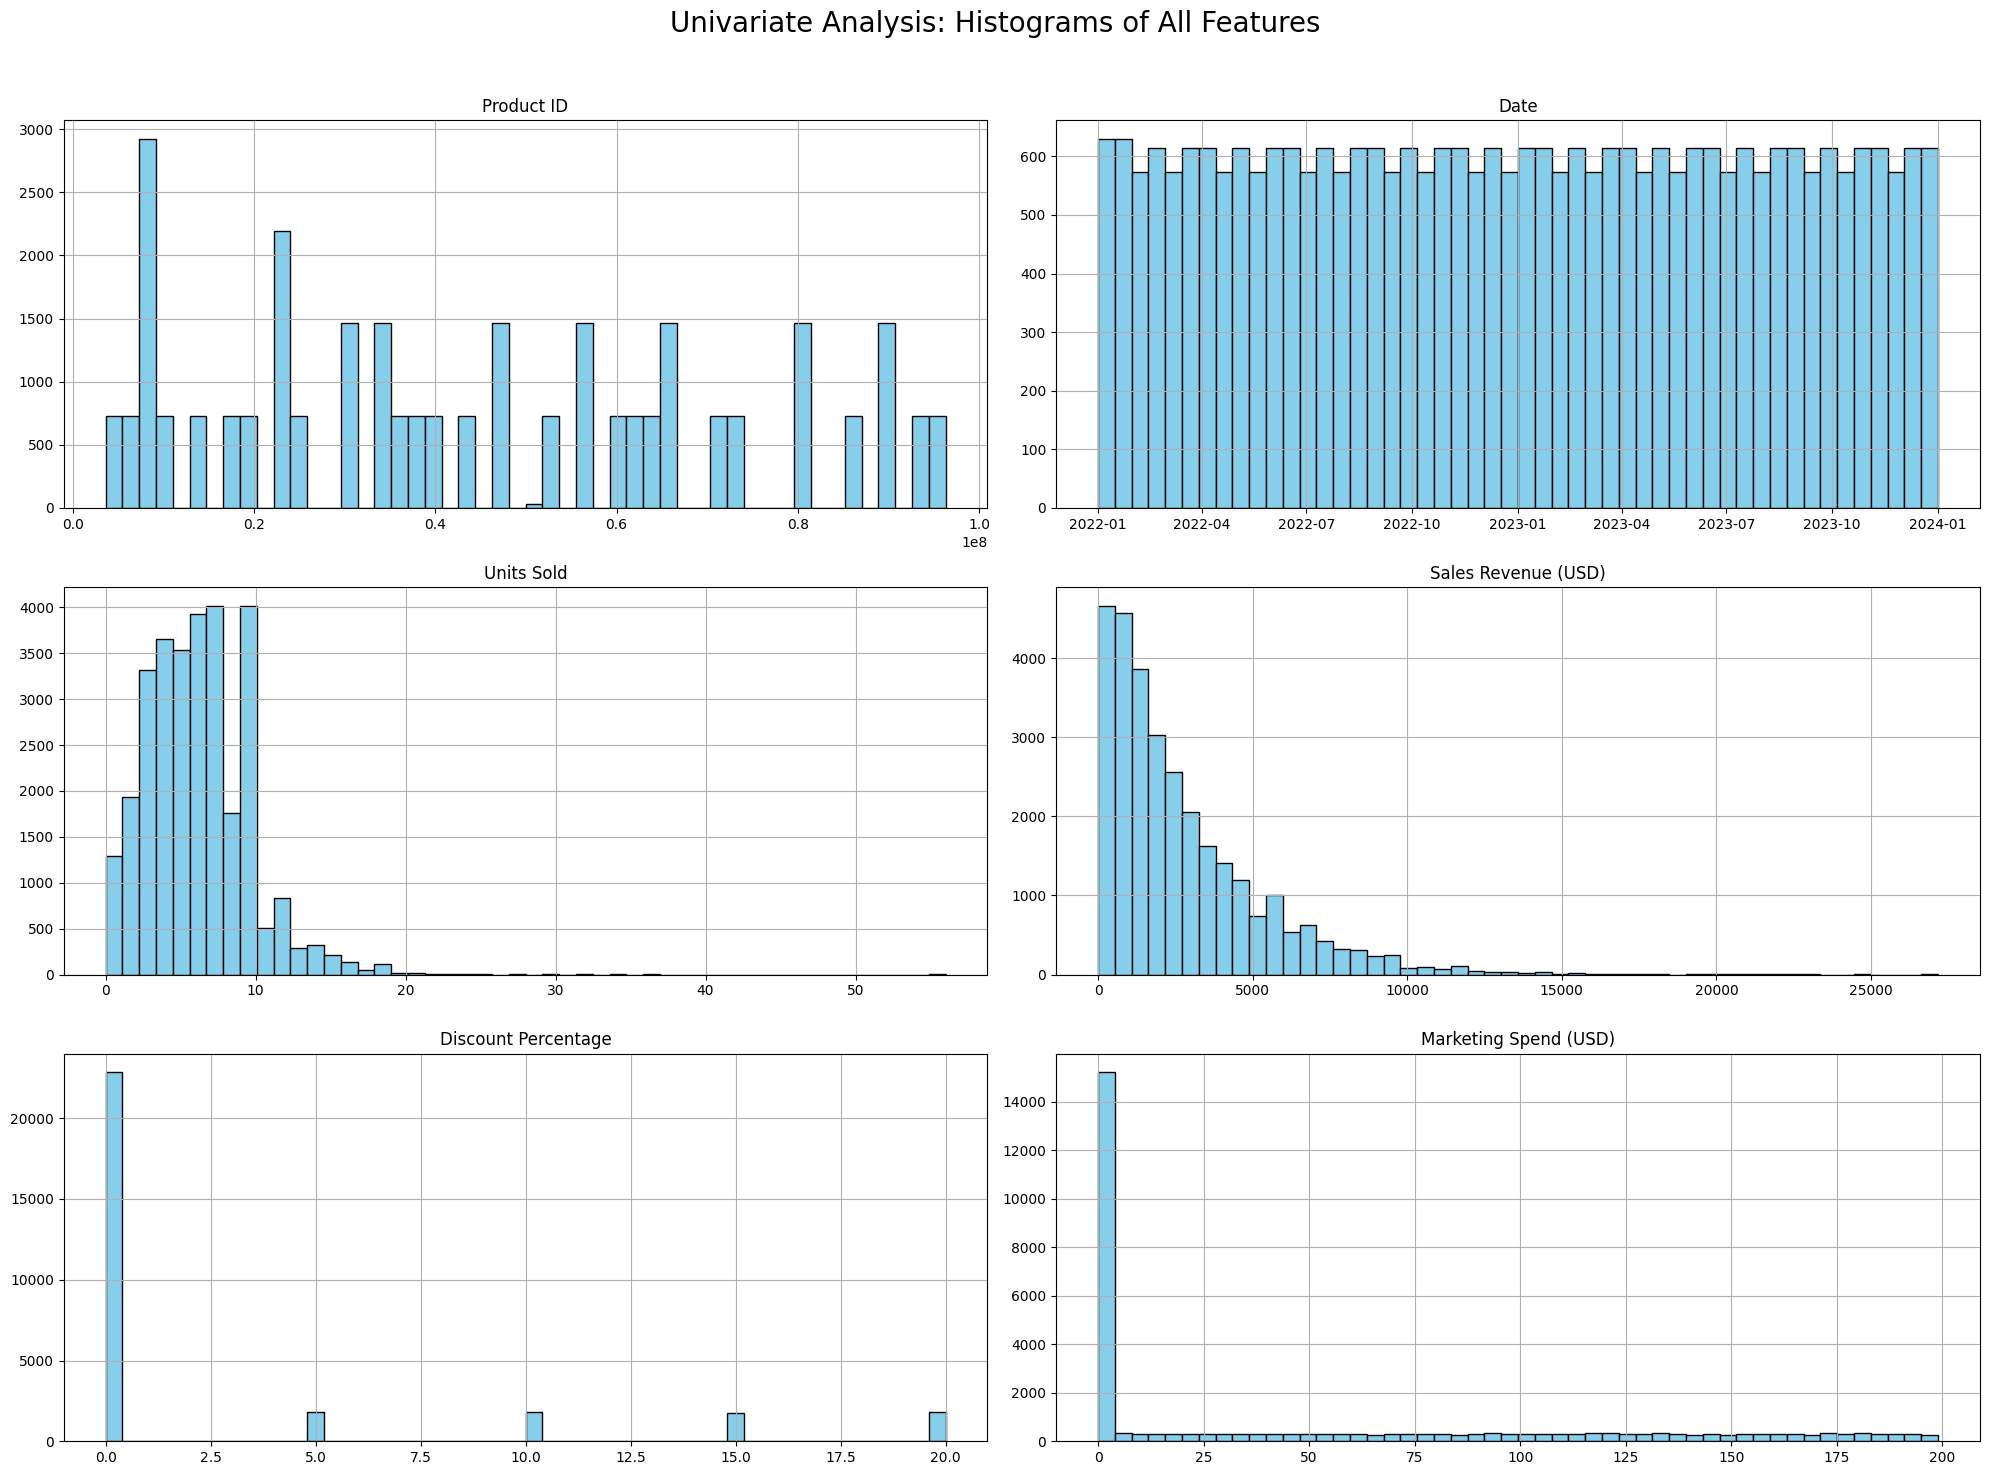

In [6]:
# Step 8: EDA - Univariate Analysis
plt.figure(figsize=(20, 15))
df_encoded.hist(bins=50, figsize=(20, 15), color='skyblue', edgecolor='black')
plt.suptitle('Univariate Analysis: Histograms of All Features', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('univariate_analysis.png', dpi=300)
plt.show()

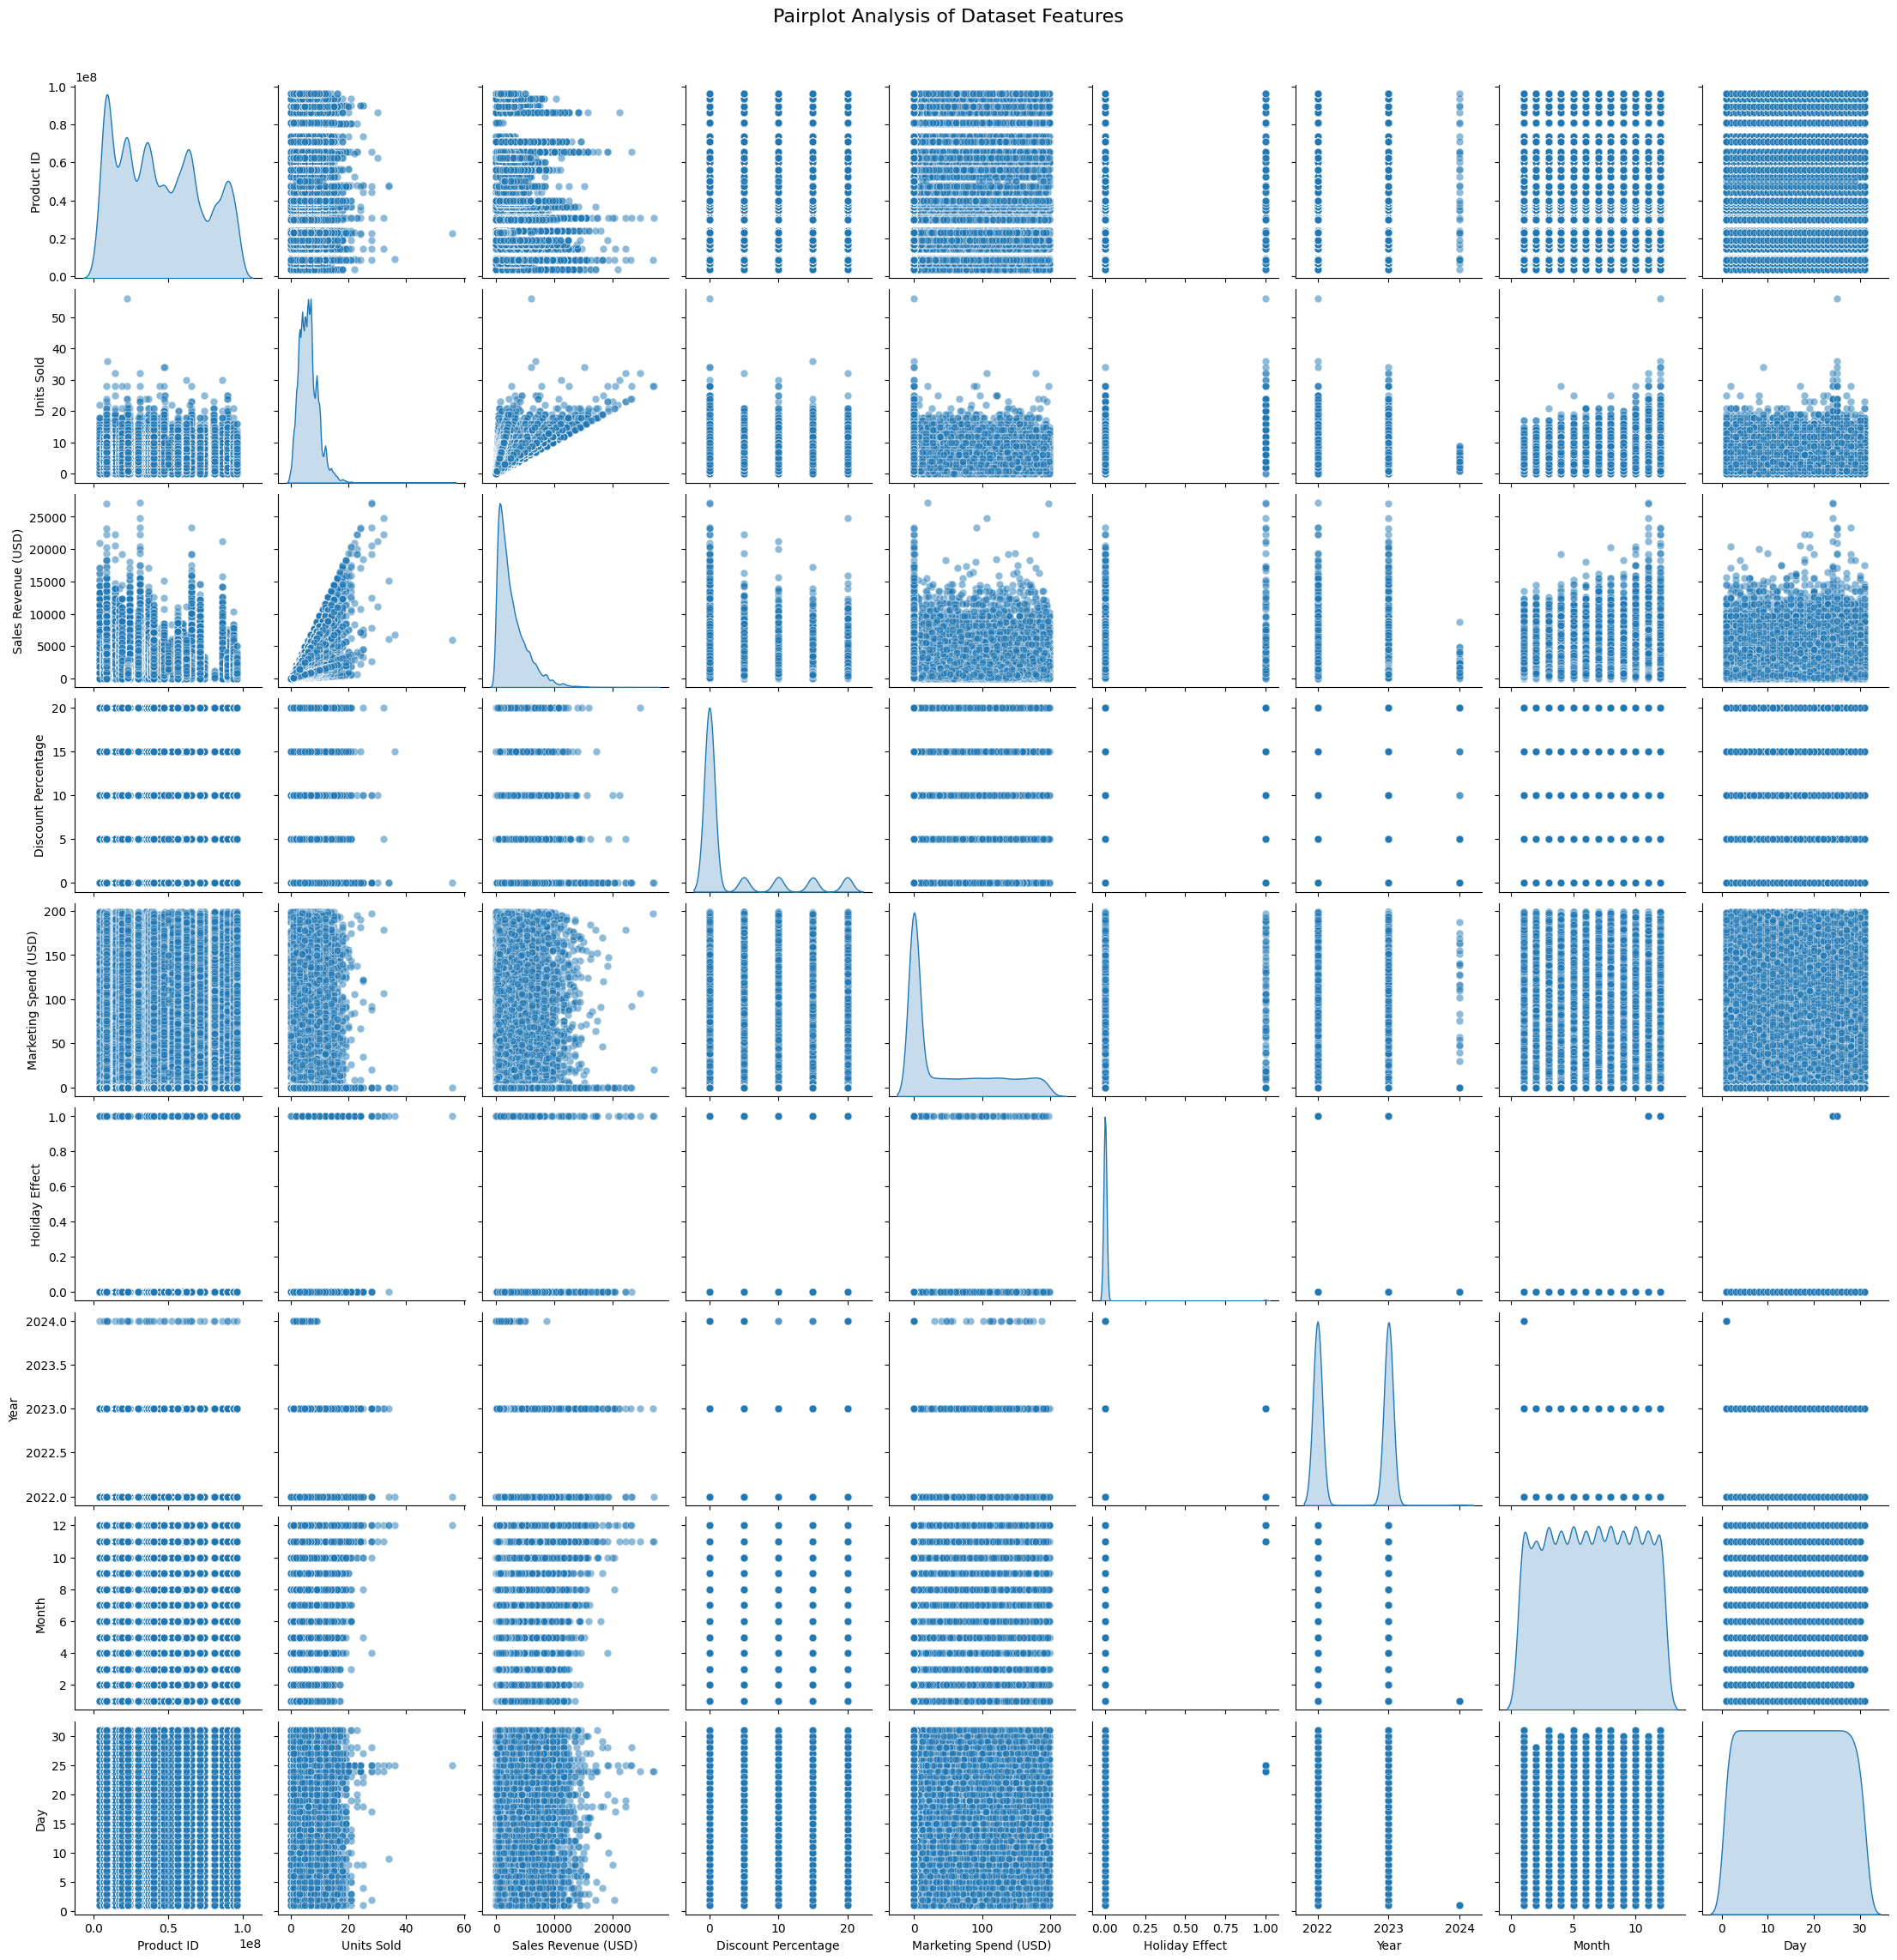

In [8]:
sns.pairplot(df, diag_kind='kde', plot_kws={'alpha': 0.5, 's': 40}, diag_kws={'shade': True, 'bw_adjust': 1})
plt.suptitle('Pairplot Analysis of Dataset Features', y=1.02, fontsize=16)
plt.show()

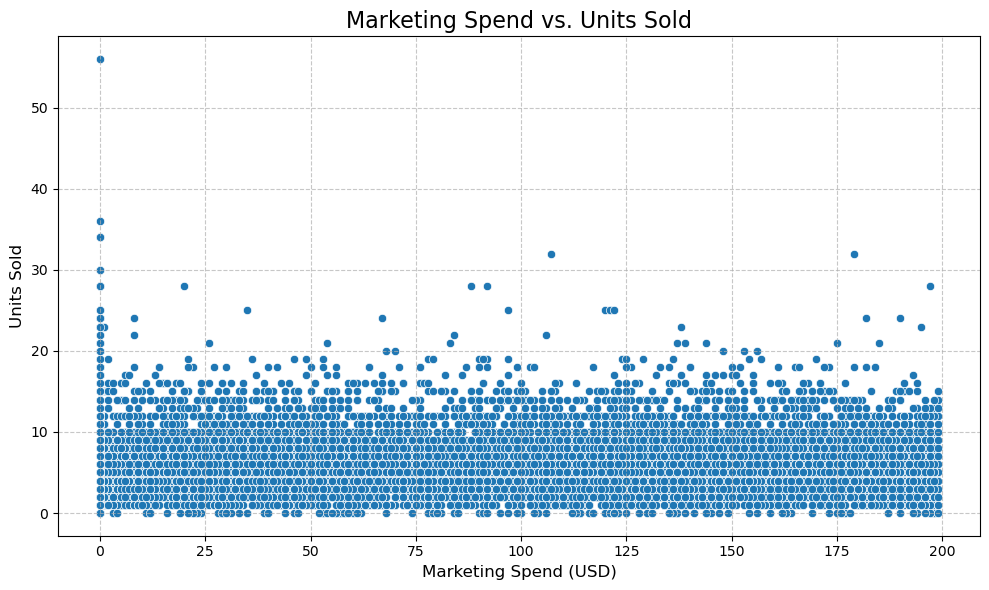

In [ ]:
# Marketing Spend vs. Units Sold
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Marketing Spend (USD)', y='Units Sold', data=df_encoded)
plt.title('Marketing Spend vs. Units Sold', fontsize=16)
plt.xlabel('Marketing Spend (USD)', fontsize=12)
plt.ylabel('Units Sold', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('spendVSunits.png', dpi=300)
plt.show()



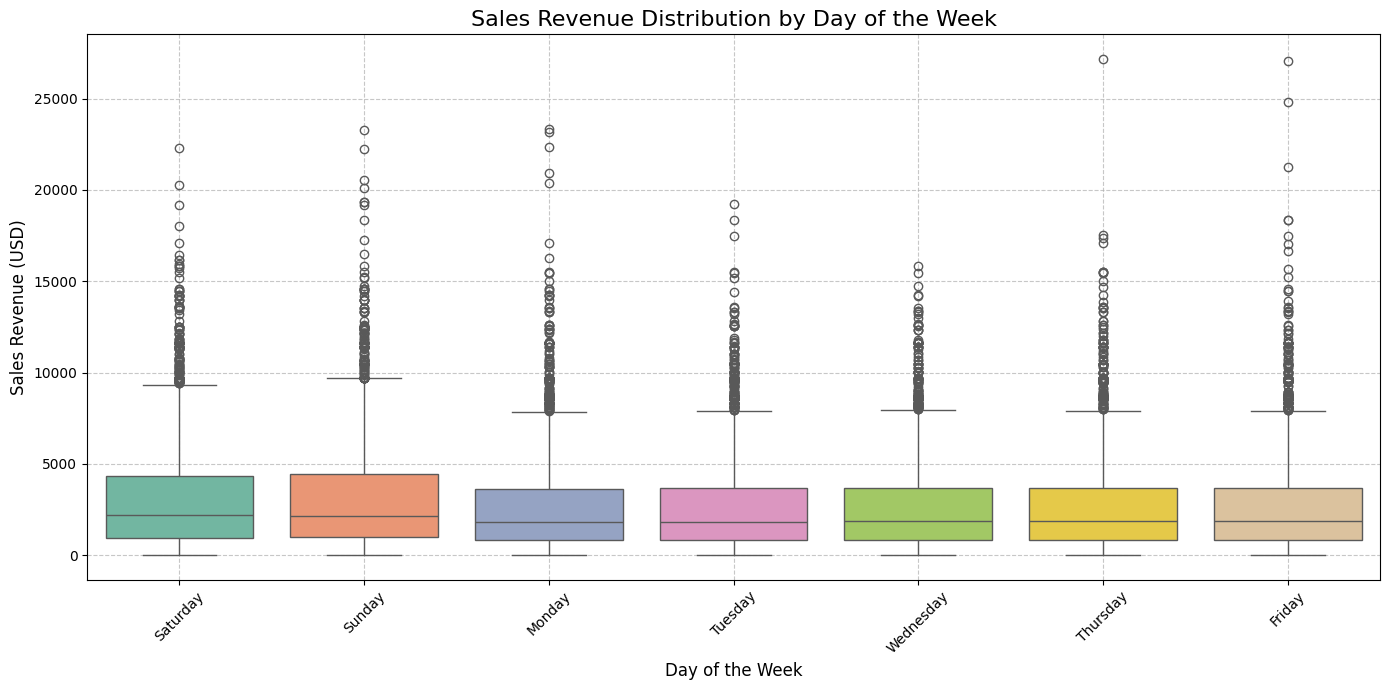

In [9]:
# Sales Revenue Distribution by Day of the Week
plt.figure(figsize=(14, 7))
sns.boxplot(data=df, x='Day of the Week', y='Sales Revenue (USD)', palette='Set2')
plt.title('Sales Revenue Distribution by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Sales Revenue (USD)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('revenuebyweekday.png', dpi=300)
plt.show()


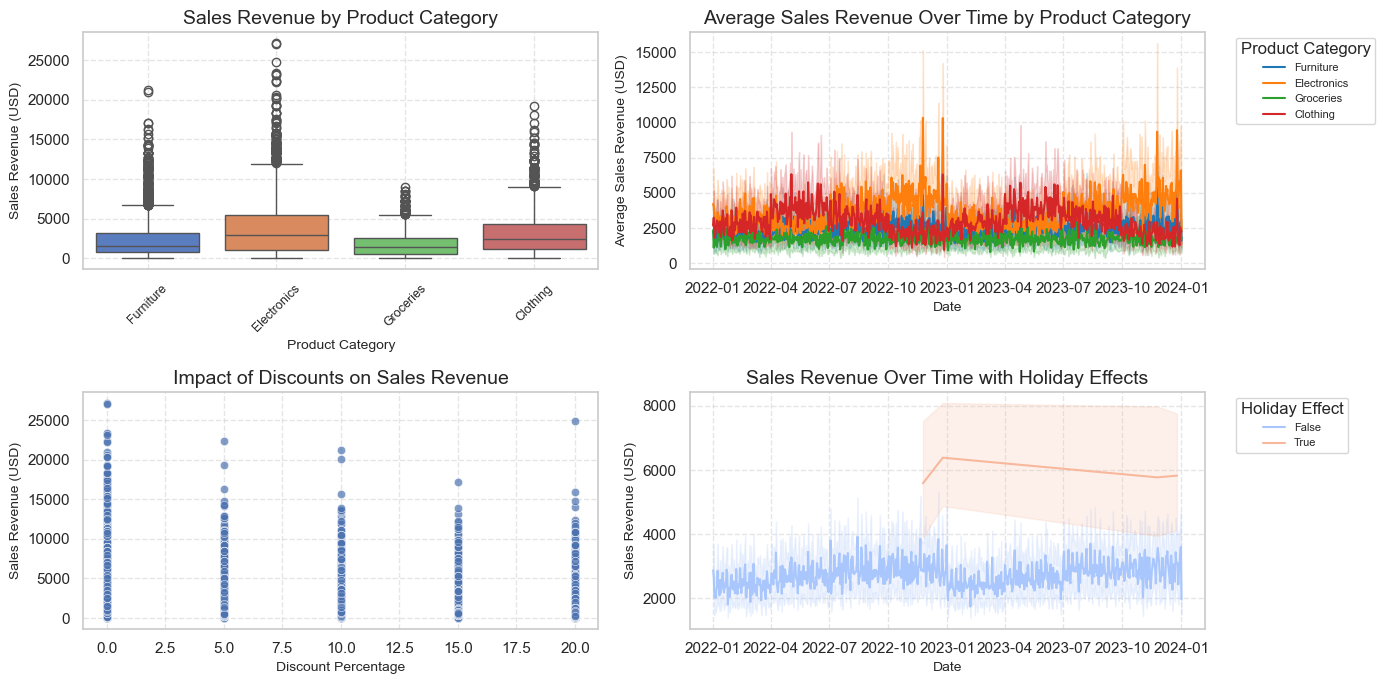

In [ ]:
# Set the general plot style for consistency
sns.set_theme(style='whitegrid')

# 1. Sales Revenue by Product Category
plt.figure(figsize=(14, 7))
plt.subplot(2, 2, 1)
sns.boxplot(x='Product Category', y='Sales Revenue (USD)', data=df, hue='Product Category',
            palette='muted', dodge=False, legend=False)  # Added hue
plt.title('Sales Revenue by Product Category', fontsize=14)
plt.xlabel('Product Category', fontsize=10)
plt.ylabel('Sales Revenue (USD)', fontsize=10)
plt.xticks(rotation=45, fontsize=9)
plt.grid(True, linestyle='--', alpha=0.5)

# 2. Average Sales Revenue Over Time by Product Category
plt.subplot(2, 2, 2)
sns.lineplot(data=df, x='Date', y='Sales Revenue (USD)', hue='Product Category',
             estimator='mean', palette='tab10')
plt.title('Average Sales Revenue Over Time by Product Category', fontsize=14)
plt.xlabel('Date', fontsize=10)
plt.ylabel('Average Sales Revenue (USD)', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)

# 3. Impact of Discounts on Sales Revenue
plt.subplot(2, 2, 3)
sns.scatterplot(x='Discount Percentage', y='Sales Revenue (USD)', data=df_encoded, alpha=0.7)
plt.title('Impact of Discounts on Sales Revenue', fontsize=14)
plt.xlabel('Discount Percentage', fontsize=10)
plt.ylabel('Sales Revenue (USD)', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)

# 4. Sales Revenue Over Time with Holiday Effect
plt.subplot(2, 2, 4)
sns.lineplot(x='Date', y='Sales Revenue (USD)', hue='Holiday Effect', data=df, palette='coolwarm')
plt.title('Sales Revenue Over Time with Holiday Effects', fontsize=14)
plt.xlabel('Date', fontsize=10)
plt.ylabel('Sales Revenue (USD)', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Holiday Effect', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)

# Adjust layout for clarity and save the figure
plt.tight_layout()
plt.savefig('combined_visualizations.png', dpi=300)
plt.show()


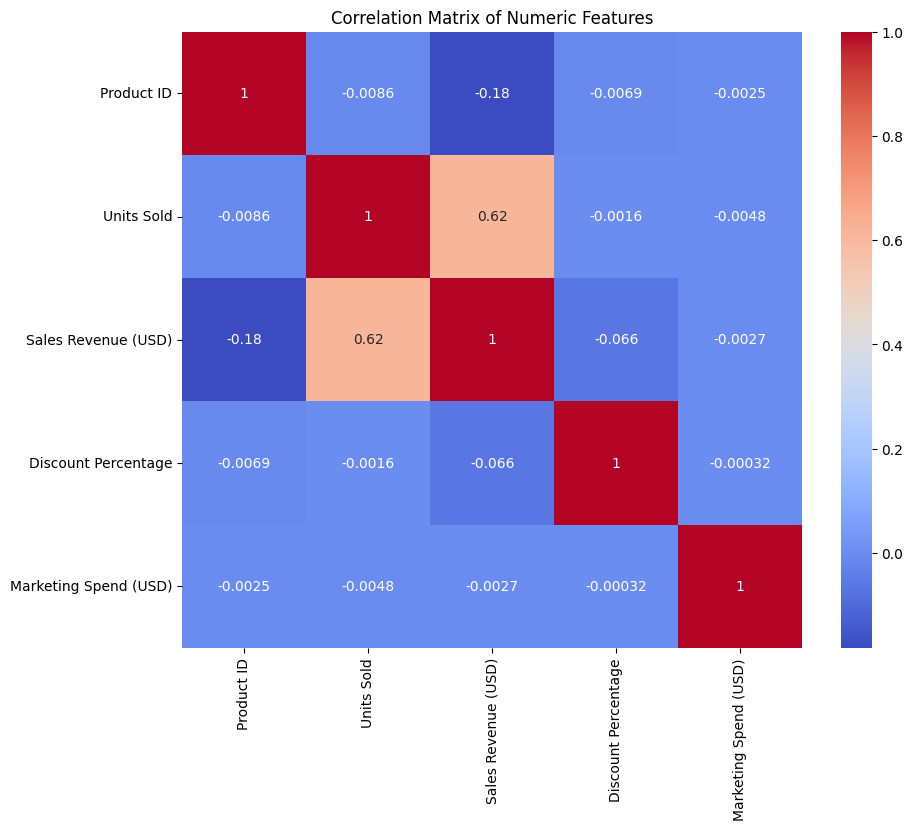

In [11]:
#Multivariate Analysis
# Select only numeric columns
numeric_df = df_encoded.select_dtypes(include=['number'])

# Calculate correlation matrix on numeric columns
corr_matrix = numeric_df.corr()

# Plot the correlation matrix

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.savefig('corr_matrix.png', dpi=300)
plt.show()

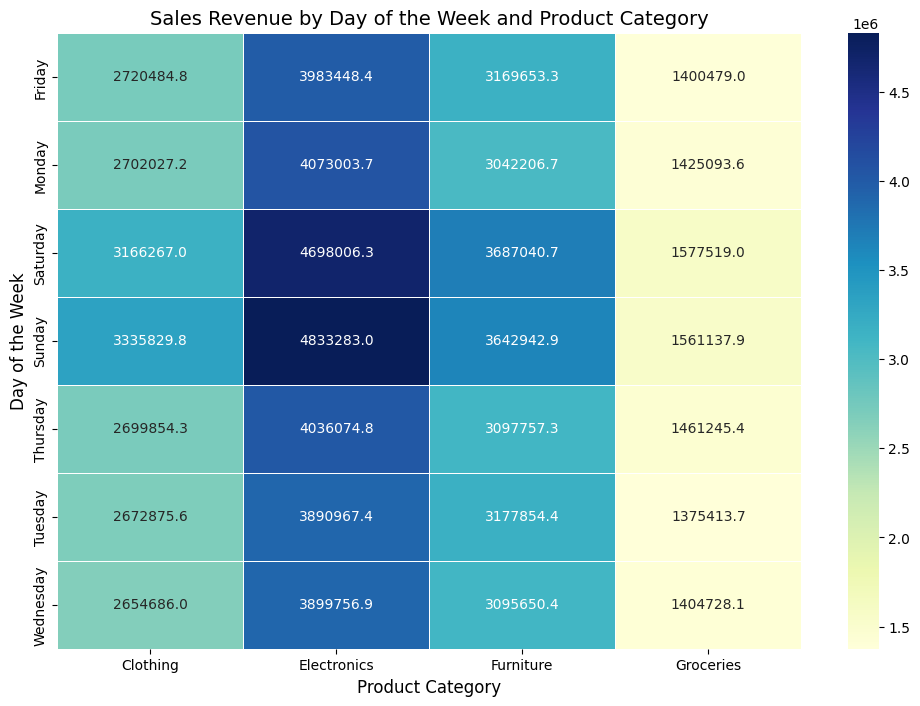

In [12]:
# 2. Heatmap of Sales Revenue by Day of the Week and Product Category
plt.figure(figsize=(12, 8))
heatmap_data = df.pivot_table(index='Day of the Week', columns='Product Category',
                              values='Sales Revenue (USD)', aggfunc='sum')
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.1f', linewidths=0.5)
plt.title('Sales Revenue by Day of the Week and Product Category', fontsize=14)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Day of the Week', fontsize=12)
plt.savefig('salesweekproduct.png', dpi=300, bbox_inches='tight')
plt.show()



In [ ]:
# Necessary Imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

# Define features and target variable
X = df[['Product ID', 'Store Location', 'Product Category', 'Units Sold',
        'Day of the Week', 'Discount Percentage', 'Marketing Spend (USD)', 'Holiday Effect']]
y = df['Sales Revenue (USD)']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), ['Units Sold', 'Discount Percentage', 'Marketing Spend (USD)']),
        ('cat', OneHotEncoder(), ['Product ID', 'Store Location', 'Product Category', 'Day of the Week']),
        ('bool', 'passthrough', ['Holiday Effect'])
    ])

# Function to evaluate a model
def evaluate_model(model, model_name):
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    test_r2 = r2_score(y_test, y_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"{model_name} | R²: {test_r2:.4f}, RMSE: {test_rmse:.4f}")

# Evaluate Random Forest and Linear Regression
evaluate_model(LinearRegression(), "Linear Regression")
evaluate_model(RandomForestRegressor(random_state=42), "Random Forest")



Linear Regression | R²: 0.8629, RMSE: 959.3323
Random Forest | R²: 0.9962, RMSE: 159.1657
